In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df.rename(columns={'TOANLOGICPHANTICH': 'LOGIC', 'GIAIQUYETVANDE':'UNGXU', 'DINHHUONGNGHENGHIEP':'HUONGNGHIEP'}, inplace=True)
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,UNGXU,KT,NGAYTHI,HUONGNGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
# Machine learning
'''
Dẫn nhập machine learning
- Dựa trên dữ liệu lịch sử (Historical data) để xây dựng mô hình (Model)
- Input đi qua Model (mô hình toán học) sẽ tính toán cho ra Output 
Các bài toán phổ biến

1. Dự báo (Prediction)
2. Phân loại (Classification)
3. Gom cụm (Clustering)
4. Luật kết hợp (Association rules)

Các phương pháp phổ biến
1. supervised
2. un-supervised
3. semi-supervised learning

Quy trình xây dựng ứng dụng Machine Learning
'''

'\nDẫn nhập machine learning\n- Dựa trên dữ liệu lịch sử (Historical data) để xây dựng mô hình (Model)\n- Input đi qua Model (mô hình toán học) sẽ tính toán cho ra Output \nCác bài toán phổ biến\n\n1. Dự báo (Prediction)\n2. Phân loại (Classification)\n3. Gom cụm (Clustering)\n4. Luật kết hợp (Association rules)\n\nCác phương pháp phổ biến\n1. supervised\n2. un-supervised\n3. semi-supervised learning\n\nQuy trình xây dựng ứng dụng Machine Learning\n'

In [5]:
'''
Dẫn nhập hồi quy tuyến tính
Ứng dụng trong bài toán Prediction

Bài toán 1: Hãy dự báo điểm T6 dựa trên T5
input: T5
Output T6
T6 = f(T5) -> T6 = Ao + A1.T5 + epsilon
'''

'\nDẫn nhập hồi quy tuyến tính\nỨng dụng trong bài toán Prediction\n\nBài toán 1: Hãy dự báo điểm T6 dựa trên T5\ninput: T5\n'

In [3]:
df[['T5','T6']].head(5)

,T5,T6
0,7.4,6.9
1,3.0,4.0
2,4.8,5.7
3,6.1,7.4
4,6.8,8.0


In [4]:
df[['T5','T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


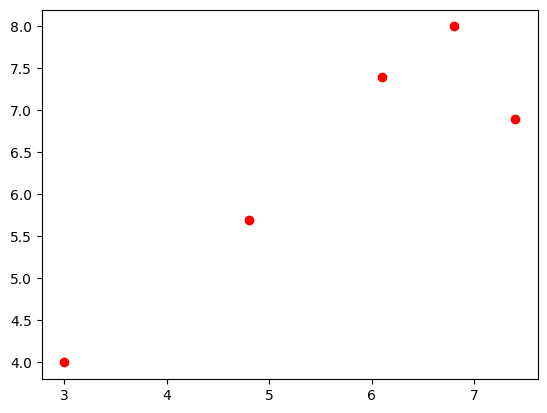

In [5]:
plt.plot(df[['T5']][0:5],df[['T6']][0:5],'ro')
plt.show()

In [6]:
'''
Lý thuyết về hồi quy tuyến tính
1. Phương pháp giải

2. Các Phương pháp giải tối ưu chi phí tính toán

3. DLS tối ưu sai số
'''

'\nLý thuyết về hồi quy tuyến tính\n1. Phương pháp giải\n\n2. Các Phương pháp giải tối ưu chi phí tính toán\n\n3. DLS tối ưu sai số\n'

In [13]:
# Bài toán 2: Hãy dự báo điểm thi đánh giá năng lực phần LOGIC dựa trên điểm trung bình toán học kì 1 và học kì 2 năm lớp 12

In [7]:
'''
Input: T5 T6
Output: LOGIC
LOGIC = f(T5,T6) = Ao + A1.T5 + A2.T6 + epsilon

Xây dựng mô hình trong Machine Learning
Bước 1: Xác định bài toán
B2: Xác định input và output
B3: Xác định mô hình xử lý
B4: Chia tập dữ liệu ra làm 2 phần: training và testing theo tỉ lệ 90% và 10%
B5: Chạy mô hình
B6: Đánh giá mô hình
B7: Triển khai mô hình
'''

'\nInput: T5 T6\nOutput: LOGIC\nLOGIC = f(T5,T6) = Ao + A1.T5 + A2.T6 + epsilon\n\nXây dựng mô hình trong Machine Learning\nBước 1: Xác định bài toán\nB2: Xác định input và output\nB3: Xác định mô hình xử lý\nB4: Chia tập dữ liệu ra làm 2 phần: training và testing theo tỉ lệ 90% và 10%\nB5: Chạy mô hình\nB6: Đánh giá mô hình\nB7: Triển khai mô hình\n'

In [22]:
# Tập dữ liệu
X = df[['T5','T6']].values #input
y = df[['LOGIC']].values #output

#Chia tách ra training và testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=5)

#Xây dựng mô hình hồi quy tuyến tính đa biến
# LOGIC = A0 + A1*T5 + A2*T6 + epsilon
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
# intercept: hệ số tự do
print(model.intercept_)

#For retrieving the slope (cofficient):
print(model.coef_)
# A0, A1, A2 tương ứng với các số dưới

[2.68763106]
[[-0.11189321  0.3331366 ]]


In [10]:
pd.DataFrame(X_test).to_csv("input_test.csv")

In [11]:
pd.DataFrame(y_test).to_csv("output_test.csv")

In [12]:
# Tính toán giá trị điểm thi LOGIC dựa trên mô hình
from sklearn import metrics

y_test_pred = model.predict(X_test)

In [13]:
pd.DataFrame(y_test_pred).to_csv("output_test_pred.csv")

In [14]:
# sử dụng các hàm python để đánh giá chất lượng mô hình trên tập test
'''
Tính toán các MAE, MSE, RMSE trên các tập training và test để đánh giá mô hình
Sau đó đưa ra kết luận
'''
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Scored:', model.score(X_test,y_test))

Mean Absolute Error: 0.7739518570284657
Mean Squared Error: 0.8285004273228378
Root Mean Squared Error: 0.9102199884219406
Scored: -0.06473950499320513


In [15]:
'''
Homework: Sử dụng độ đo đánh giá mô hình RMSE trên tập train và test.
Hãy trả lời câu hỏi sau:
- Nếu kết quả rmse trên tập train > rmse trên tập test thì mô hình có ý nghĩa là gì
- Tương tự cho trường hợp bằng nhau và bé hơn
# overfit, underfit
'''

'\nHomework: Sử dụng độ đo đánh giá mô hình RMSE trên tập train và test.\nHãy trả lời câu hỏi sau:\n- Nếu kết quả rmse trên tập train > rmse trên tập test thì mô hình có ý nghĩa là gì\n- Tương tự cho trường hợp bằng nhau và bé hơn\n# overfit, underfit\n'

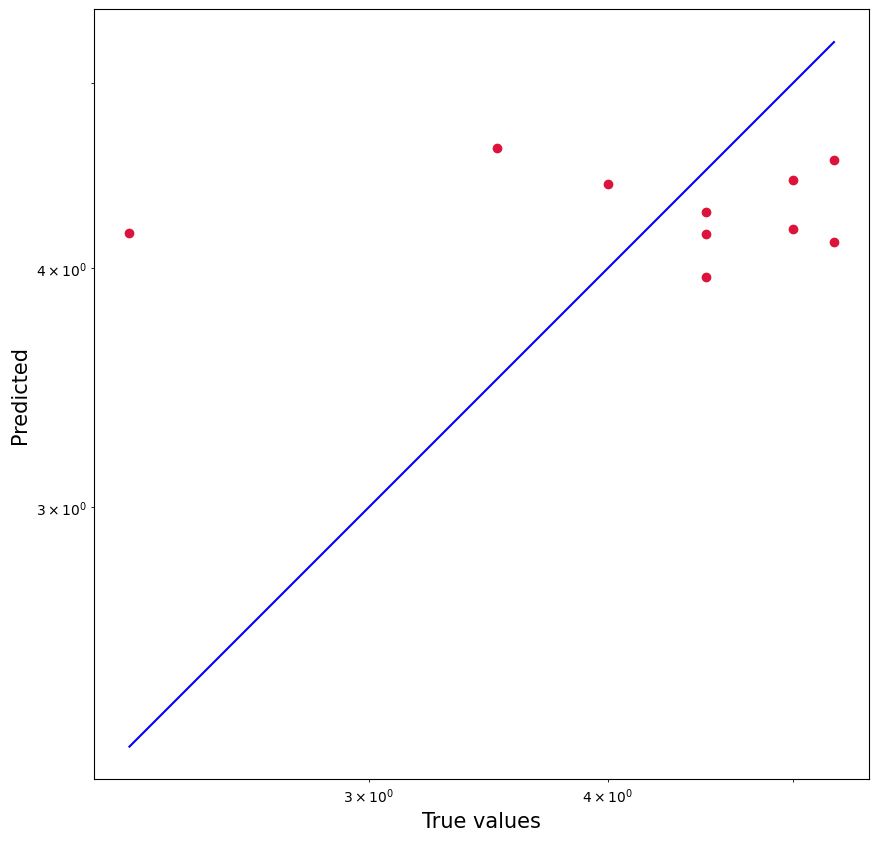

In [16]:
'''
Trực quan hoá dữ liệu điểm thi LOGIC thực (Actual) và dữ liệu LOGIC
theo dự báo (Predicted) trên tập test
y_test: actual value
y_test_pred: predicted value
'''
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_test_pred,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()


In [17]:
# Residual Plot
# Tự nghiên cứu

In [18]:
# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
'''
Lưu trữ mô hình hồi quy xuống thiết bị lưu trữ với tên model_linear_regression.sav
'''
import pickle
pickle.dump(model,open('model_linear_regression.sav','wb'))

In [19]:
'''
Xây dựng chương trình: nhập điểm T5 T6 từ bàn phím, hãy dự báo điểm thi logic
'''
# Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav','rb'))

vT5 = float(input('Điểm học kì 1 năm lớp 12: '))
vT6 = float(input('Điểm học kì 2 năm lớp 12: '))

predicted_vLogic = loaded_model.predict([[vT5,vT6]])
print(f'Dự báo điểm thi LOGIC là: {predicted_vLogic}')
# MAE = 0.77 thì trừ đi sai số [x,y]

KeyboardInterrupt: Interrupted by user